In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as stats 
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [6]:
df.groupby(['type'])['isFlaggedFraud'].sum()

type
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
TRANSFER    16
Name: isFlaggedFraud, dtype: int64

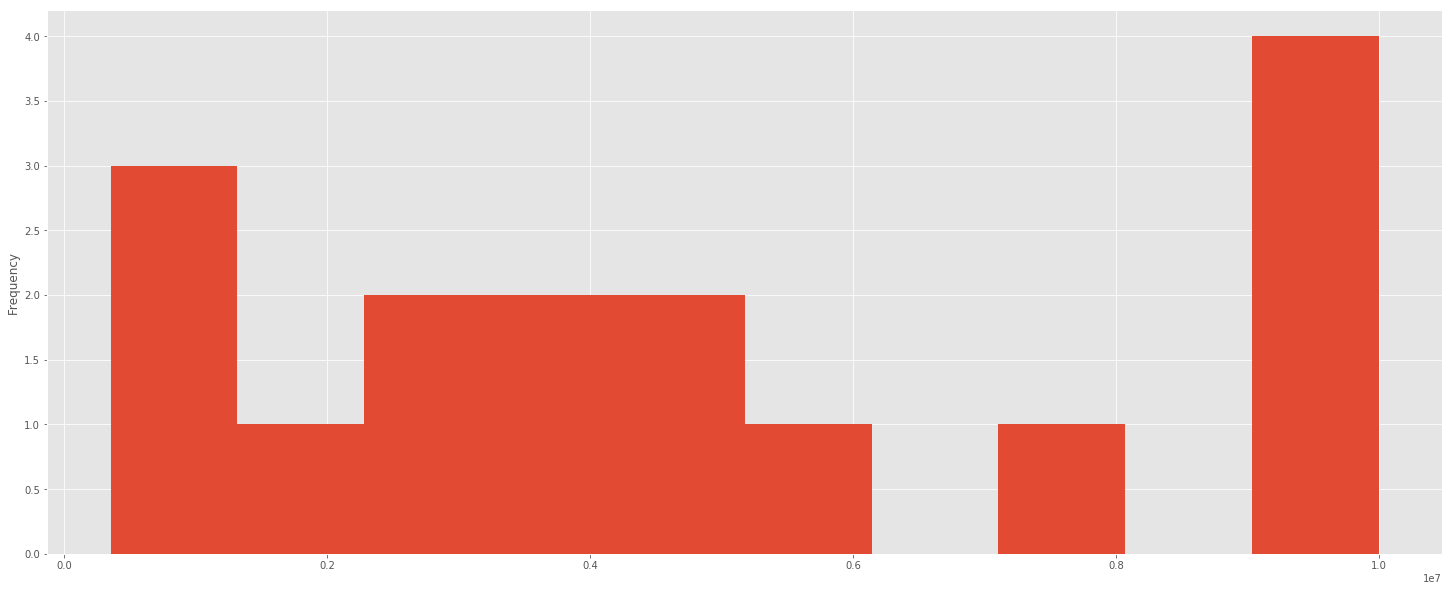

In [7]:
plt.figure(figsize=(25 , 10))

df[df['isFlaggedFraud'] == 1]['amount'].plot(kind = 'hist')

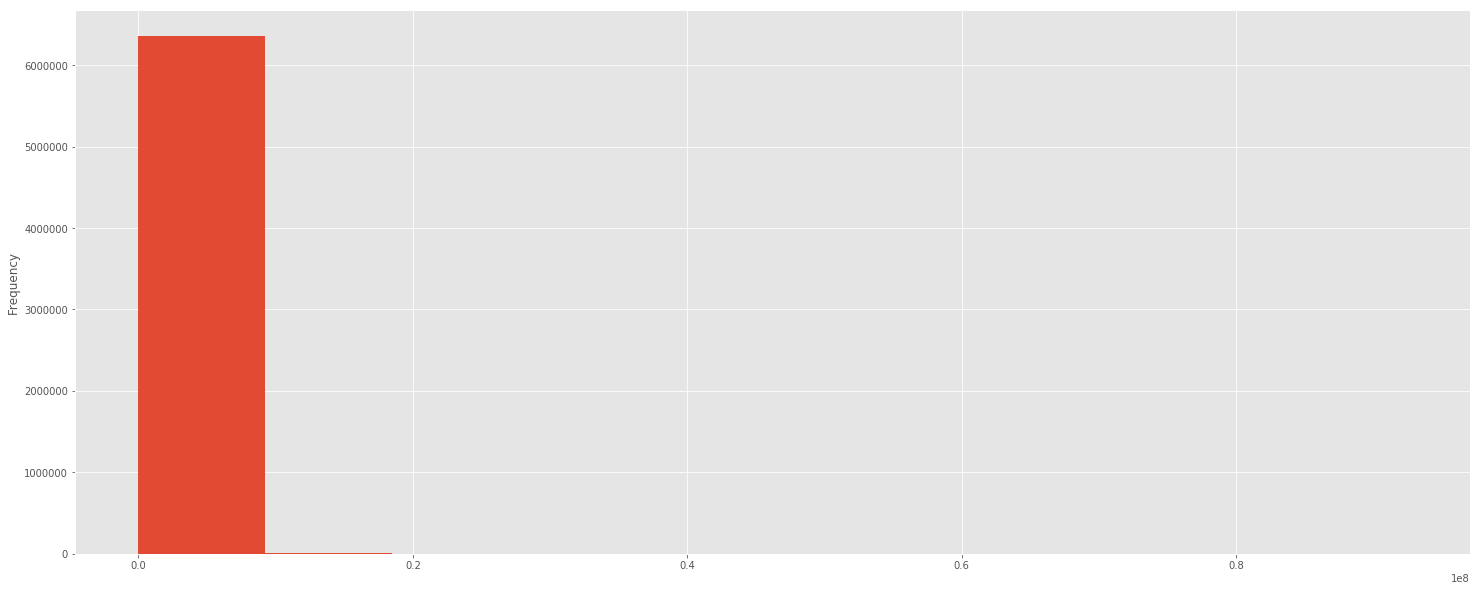

In [10]:
plt.figure(figsize=(25 , 10))

df[df['isFlaggedFraud'] == 0]['amount'].plot(kind = 'hist')

In [11]:
df.loc[df['isFlaggedFraud'] == 0,['type' , 'amount']].groupby('type').mean()

,amount
type,
CASH_IN,168920.242004
CASH_OUT,176273.964346
DEBIT,5483.665314
PAYMENT,13057.604660
TRANSFER,910528.383183


In [12]:
df.loc[df['isFlaggedFraud'] == 1,['type' , 'amount']].groupby('type').mean()

,amount
type,
TRANSFER,4.861598e+06


In [13]:
df[['type' , 'amount' , 'isFlaggedFraud']].groupby(['type' ,'isFlaggedFraud']).mean()

amount
type     isFlaggedFraud              
CASH_IN  0               1.689202e+05
CASH_OUT 0               1.762740e+05
DEBIT    0               5.483665e+03
PAYMENT  0               1.305760e+04
TRANSFER 0               9.105284e+05
         1               4.861598e+06

In [14]:
pd.pivot_table(df , index= ['isFlaggedFraud' , 'type'] ,values= 'amount' , aggfunc= 'mean')

amount
isFlaggedFraud type                  
0              CASH_IN   1.689202e+05
               CASH_OUT  1.762740e+05
               DEBIT     5.483665e+03
               PAYMENT   1.305760e+04
               TRANSFER  9.105284e+05
1              TRANSFER  4.861598e+06

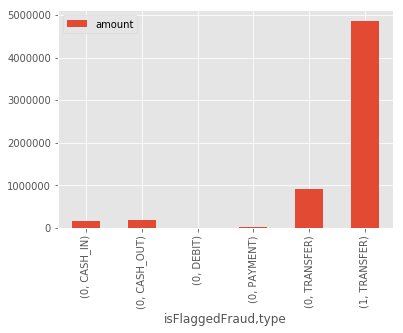

In [15]:
pd.pivot_table(df , index= ['isFlaggedFraud' , 'type'] ,values= 'amount' , aggfunc= 'mean').plot(kind = 'bar')

### Infrential Statistics

H0 : P(isFlaggedFraud == 1) = P(isFlaggedFraud == 0)

Ha : P(isFlaggedFraud == 1) ≠ P(isFlaggedFraud == 0)

In [17]:
import scipy.stats as stats

In [19]:
observe_tbl = pd.crosstab(df['type'] , df['isFlaggedFraud'])

In [20]:
observe_tbl

isFlaggedFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


In [21]:
stats.chi2_contingency(observe_tbl)

(175.0310288604575,
 8.699902785322113e-37,
 4,
 array([[1.39928048e+06, 3.51876177e+00],
        [2.23749437e+06, 5.62661294e+00],
        [4.14318958e+04, 1.04188526e-01],
        [2.15148959e+06, 5.41033725e+00],
        [5.32907660e+05, 1.34009952e+00]]))

##### P-Value of 8.699902785322113e-37 indicates that there are statistically sigificant difference between the type of the transactions and the probability of transaction being flagged as fraud

# Machine Learning

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
df['type'] = df['type'].astype('category')

df = pd.get_dummies(df , columns= ['type'])

In [29]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [30]:
df.shape

(6362620, 14)

### Build Train and Test Datasets

In [31]:
Taining_set= df[:300000]
Test_set = df[300000:]

In [39]:

X_Taining_set = Taining_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values

y_Taining_set = Taining_set['isFlaggedFraud'].values

X_Test_set = Test_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1).values

y_Test_set = Test_set['isFlaggedFraud'].values

In [46]:
count_class_0 , count_class_1 = df.isFlaggedFraud.value_counts()

In [47]:
count_class_0

6362604

In [48]:
count_class_1

16

There is a huge difference between our two target classes. If we split our data set into train and test as it is, there is a chance that we dont get any sample of minority class in our training data set. In order to avoid that we can use special techniques for handling imbalanced data such as **up-sampling minority or down-sampling majority**. 

In this case we prefer to go with **up-sampling the minority class**. 

Another point worth mentioning is the correct metric of evaluating the performance of models. **In dealing with imabalnced data sets accuracy can be a misleading metric**. Many machine learning algorithms are designed to maximize overall accuracy by default and in imbalanced datasets it can be achieved by completely ignoring the minority class in favor of majority class.

The better way to evaluating our models is to check the false classifications such as False Negatives or False Positives. Precision and Recall scores along with Confusion Matrix are proper metrics to evaluate performance of our models. 

In this specific problem the cost of missing a fraudulent transasction and miss classifying it is very high. Therefore the focus of our model optimization should be to reduce the number of False Negatives as much as poossible. 

**Recall** is the metric that measures **False Negatives.** **Our goal should be to increase the Recall score.** 

### Random upsampling

In [67]:
df_majority = df[df['isFlaggedFraud'] == 0 ]
df_minority = df[df['isFlaggedFraud'] == 1]

In [72]:
Taining_set= df[:300000]
Test_set = df[300000:]

In [78]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace = True , n_samples = 10000 , random_state = 42)

Taining_set_upsampled = pd.concat([Taining_set , df_minority_upsampled])

In [82]:

X_Taining_set = Taining_set_upsampled.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values

y_Taining_set = Taining_set_upsampled['isFlaggedFraud'].values

X_Test_set = Test_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1).values

y_Test_set = Test_set['isFlaggedFraud'].values

In [83]:
set(y_Taining_set)

{0, 1}

In [84]:
%%time

lr = LogisticRegression()

lr.fit(X_Taining_set, y_Taining_set)

lr_predict = lr.predict(X_Test_set)

print (accuracy_score(y_Test_set , lr_predict))

print (confusion_matrix(y_Test_set , lr_predict))

print("F1 score: ", f1_score(y_Test_set , lr_predict))

print("Precision score: " , precision_score(y_Test_set , lr_predict))

print("Recall score: " , recall_score(y_Test_set , lr_predict))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7057519686208273
[[4278691 1783913]
 [      1      15]]
F1 score:  1.681667137533465e-05
Precision score:  8.408411101793346e-06
Recall score:  0.9375
CPU times: user 32.9 s, sys: 1.21 s, total: 34.1 s
Wall time: 9.11 s


In [85]:
%%time 

nb = MultinomialNB()

nb.fit(X_Taining_set , y_Taining_set)

nb_predict = nb.predict(X_Test_set)

print (accuracy_score(y_Test_set , nb_predict))

print (confusion_matrix(y_Test_set , nb_predict))


0.6173133067881543
[[3742520 2320084]
 [      0      16]]
CPU times: user 13.5 s, sys: 1.02 s, total: 14.5 s
Wall time: 5.39 s


In [86]:
%%time

import scipy as sp

param_grid = {'alpha' : sp.stats.uniform(scale = 1)}

random_nb = RandomizedSearchCV(nb , param_grid , cv = 3 )

random_nb.fit(X_Taining_set , y_Taining_set)

CPU times: user 13.3 s, sys: 515 ms, total: 13.8 s
Wall time: 2.34 s


In [87]:
random_nb.best_params_

{'alpha': 0.0001231321781454131}

In [88]:
%%time 

nb = MultinomialNB(alpha = 0.0001231321781454131 )

nb.fit(X_Taining_set , y_Taining_set)

nb_predict = nb.predict(X_Test_set)

print (accuracy_score(y_Test_set , nb_predict))

print (confusion_matrix(y_Test_set , nb_predict))

print("F1 score: ", f1_score(y_Test_set , nb_predict))

print("Precision score: " , precision_score(y_Test_set , nb_predict))

print("Recall score: " , recall_score(y_Test_set , nb_predict))

0.6226232223032286
[[3774712 2287892]
 [      0      16]]
F1 score:  1.3986478571840673e-05
Precision score:  6.993288191658056e-06
Recall score:  1.0
CPU times: user 31.8 s, sys: 773 ms, total: 32.6 s
Wall time: 8.14 s
